In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [51]:
df = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/credit_scoring/main/base_dados_traduzida.csv")
df.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   default                      1000 non-null   int64 
 1   conta_corrente               1000 non-null   object
 2   prazo_emprestimo_meses       1000 non-null   int64 
 3   historico_credito            1000 non-null   object
 4   proposito_emprestimo         1000 non-null   object
 5   valor_emprestimo             1000 non-null   int64 
 6   reserva_cc                   1000 non-null   object
 7   tempo_emprego_atual          1000 non-null   object
 8   taxa_comp_salario            1000 non-null   int64 
 9   sexo_est_civil               1000 non-null   object
 10  outros_fiadores              1000 non-null   object
 11  anos_residencia_atual        1000 non-null   int64 
 12  propriedade                  1000 non-null   object
 13  idade                        1000 

In [53]:
df.isnull().sum()

default                        0
conta_corrente                 0
prazo_emprestimo_meses         0
historico_credito              0
proposito_emprestimo           0
valor_emprestimo               0
reserva_cc                     0
tempo_emprego_atual            0
taxa_comp_salario              0
sexo_est_civil                 0
outros_fiadores                0
anos_residencia_atual          0
propriedade                    0
idade                          0
outros_planos_financiamento    0
tipo_residencia                0
n_creditos_banco               0
status_emprego                 0
n_dependentes                  0
telefone                       0
trabalhador_estrangeiro        0
dtype: int64

In [54]:
#precisamos transformar as colunas categoricas em dummies ou usando o map
df["conta_corrente"].unique()

array(['< 0 DM', '0 <= ... < 200 DM', 'no checking account',
       '>= 200 DM / salary assignments for at least 1 year'], dtype=object)

In [55]:
dic = {'< 0 DM':0, '0 <= ... < 200 DM':1,'no checking account':2,'>= 200 DM / salary assignments for at least 1 year':3}
df["conta_corrente"] = df["conta_corrente"].map(dic)
df.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,0,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,1,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,2,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,0,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,0,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [56]:
df["historico_credito"].unique()

array(['critical account/ other credits existing (not at this bank)',
       'existing credits paid back duly till now',
       'delay in paying off in the past',
       'no credits taken/ all credits paid back duly',
       'all credits at this bank paid back duly'], dtype=object)

In [57]:
dic = {'critical account/ other credits existing (not at this bank)':0,
       'existing credits paid back duly till now':1,
       'delay in paying off in the past':2,
       'no credits taken/ all credits paid back duly':3,
       'all credits at this bank paid back duly':4}
df["historico_credito"] = df["historico_credito"].map(dic)
df["historico_credito"].unique()

array([0, 1, 2, 3, 4])

In [58]:
df["proposito_emprestimo"].unique()

array(['domestic appliances', '(vacation - does not exist?)',
       'radio/television', 'car (new)', 'car (used)', 'business',
       'repairs', 'education', 'furniture/equipment', 'retraining'],
      dtype=object)

In [59]:
dic = {'domestic appliances':0,'(vacation - does not exist?)':1,
       'radio/television':2,'car (new)':3,'car (used)':4,'business':5,
       'repairs':6,'education':7,'furniture/equipment':8,'retraining':9}
df["proposito_emprestimo"] = df["proposito_emprestimo"].map(dic)

In [60]:
df["reserva_cc"].unique()

array(['unknown/ no savings account', '... < 100 DM',
       '500 <= ... < 1000 DM ', '.. >= 1000 DM ', '100 <= ... < 500 DM'],
      dtype=object)

In [61]:
dic = {'unknown/ no savings account':0,'... < 100 DM':1,'500 <= ... < 1000 DM ':2,
     '.. >= 1000 DM ':3,'100 <= ... < 500 DM':4}
df["reserva_cc"] = df["reserva_cc"].map(dic)
df.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,0,6,0,0,1169,0,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,1,48,1,0,5951,1,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,2,12,0,1,2096,1,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,0,42,1,2,7882,1,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,0,24,2,3,4870,1,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [62]:
df["tempo_emprego_atual"].unique()

array(['.. >= 7 years', '1 <= ... < 4 years', '4 <= ... < 7 years',
       'unemployed', '... < 1 year '], dtype=object)

In [63]:
df.head(2)

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,0,6,0,0,1169,0,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,1,48,1,0,5951,1,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes


In [64]:
dic = {'.. >= 7 years':0,'1 <= ... < 4 years':1,'4 <= ... < 7 years':2,
       'unemployed':3,'... < 1 year ':4}
df["tempo_emprego_atual"] = df["tempo_emprego_atual"].map(dic)
df.head(2)


,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,0,6,0,0,1169,0,0,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,1,48,1,0,5951,1,1,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes


In [65]:
df["sexo_est_civil"].unique()

array(['male : single', 'female : divorced/separated/married',
       'male : divorced/separated', 'male : married/widowed'],
      dtype=object)

In [66]:
dic = {'male : single':0,'female : divorced/separated/married':1,'male : divorced/separated':2,
    'male : married/widowed':3}
df["sexo_est_civil"] = df["sexo_est_civil"].map(dic)
df.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,0,6,0,0,1169,0,0,4,0,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,1,48,1,0,5951,1,1,2,1,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,2,12,0,1,2096,1,2,2,0,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,0,42,1,2,7882,1,2,2,0,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,0,24,2,3,4870,1,1,3,0,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [67]:
df["propriedade"].unique()

array(['real estate',
       'if not A121 : building society savings agreement/ life insurance',
       'unknown / no property',
       'if not A121/A122 : car or other, not in attribute 6'],
      dtype=object)

In [68]:
dic = {'real estate':0,'if not A121 : building society savings agreement/ life insurance':1,
       'unknown / no property':2,'if not A121/A122 : car or other, not in attribute 6':3}
df["propriedade"] = df["propriedade"].map(dic)

In [69]:
df["outros_planos_financiamento"].unique()

array(['none', 'bank', 'stores'], dtype=object)

In [70]:
dic = {'none':0,'bank':1,'stores':2}
df["outros_planos_financiamento"] = df["outros_planos_financiamento"].map(dic)
df.head(2)

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,0,6,0,0,1169,0,0,4,0,...,4,0,67,0,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,1,48,1,0,5951,1,1,2,1,...,2,0,22,0,own,1,skilled employee / official,1,none,yes


In [71]:
df["tipo_residencia"].unique()

array(['own', 'for free', 'rent'], dtype=object)

In [72]:
dic = {'own':0,'for free':1,'rent':2}
df["tipo_residencia"] = df["tipo_residencia"].map(dic)

In [73]:
df["status_emprego"].unique()

array(['skilled employee / official', 'unskilled - resident',
       'management/ self-employed/ highly qualified employee/ officer',
       'unemployed/ unskilled - non-resident'], dtype=object)

In [74]:
dic = {'skilled employee / official':0,'unskilled - resident':1,
       'management/ self-employed/ highly qualified employee/ officer':2,
       'unemployed/ unskilled - non-resident':3}
df["status_emprego"] = df["status_emprego"].map(dic)

In [75]:
df["telefone"].unique()

array(['yes, registered under the customers name ', 'none'], dtype=object)

In [76]:
dic = {'yes, registered under the customers name ':0,'none':1}
df["telefone"] = df["telefone"].map(dic)

In [77]:
dic = {'yes':0,'no':1}
df["trabalhador_estrangeiro"] = df["trabalhador_estrangeiro"].map(dic)

In [78]:
df.head(2)

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,0,6,0,0,1169,0,0,4,0,...,4,0,67,0,0,2,0,1,0,0
1,1,1,48,1,0,5951,1,1,2,1,...,2,0,22,0,0,1,0,1,1,0


In [79]:
#uma vez que nao temos mais variaveis categoricas,podemos aplicar a regressão logistica
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000)

In [80]:
df["outros_fiadores"].unique()

array(['none', 'guarantor', 'co-applicant'], dtype=object)

In [81]:
dic = {'none':0,'guarantor':1,'co-applicant':2}
df["outros_fiadores"] = df["outros_fiadores"].map(dic)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   default                      1000 non-null   int64
 1   conta_corrente               1000 non-null   int64
 2   prazo_emprestimo_meses       1000 non-null   int64
 3   historico_credito            1000 non-null   int64
 4   proposito_emprestimo         1000 non-null   int64
 5   valor_emprestimo             1000 non-null   int64
 6   reserva_cc                   1000 non-null   int64
 7   tempo_emprego_atual          1000 non-null   int64
 8   taxa_comp_salario            1000 non-null   int64
 9   sexo_est_civil               1000 non-null   int64
 10  outros_fiadores              1000 non-null   int64
 11  anos_residencia_atual        1000 non-null   int64
 12  propriedade                  1000 non-null   int64
 13  idade                        1000 non-null   int6

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
log_reg = LogisticRegression(max_iter=1000)
y = df["default"]
x = df.drop(columns="default",axis=1)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=77)

In [84]:
log_reg.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [85]:
print(log_reg.score(x_train,y_train))

0.74


In [86]:
previsoes = log_reg.predict(x_test)
previsoes

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0])

In [87]:
from sklearn.metrics import accuracy_score
acuracia = accuracy_score(y_test,previsoes)
acuracia

0.7833333333333333

In [88]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,previsoes))

[[191  23]
 [ 42  44]]


In [89]:
from sklearn.metrics import classification_report
print(classification_report(y_test,previsoes))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       214
           1       0.66      0.51      0.58        86

    accuracy                           0.78       300
   macro avg       0.74      0.70      0.71       300
weighted avg       0.77      0.78      0.77       300



In [90]:
from sklearn.metrics import roc_curve,roc_auc_score
previsao_prob = log_reg.predict_proba(x_test)[:,1]
#tfp = taxa de falsos positivos,tvp = taxa verdadeiros ṕositivos
tfp,tvp,limite = roc_curve(y_test,previsao_prob)
print('roc_auc',roc_auc_score(y_test,previsao_prob))

roc_auc 0.758150402086503


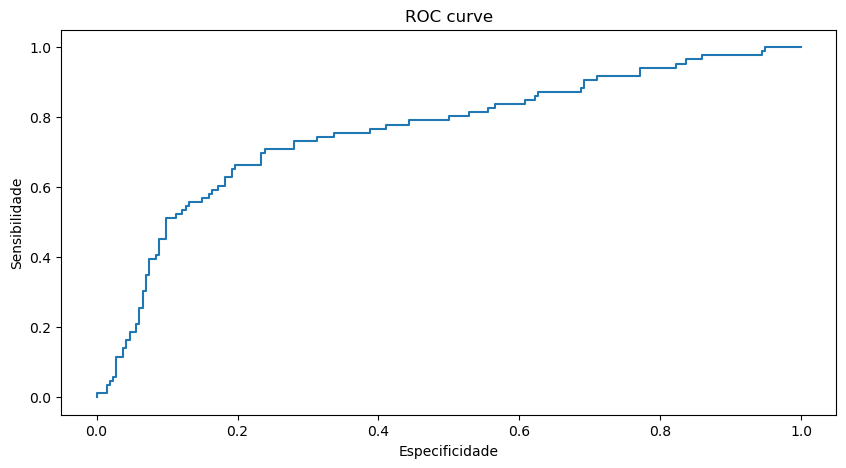

In [91]:
#plotando a curva roc
plt.figure(figsize=(10,5))
plt.title("ROC curve")
plt.plot(tfp,tvp)
plt.xlabel("Especificidade")
plt.ylabel("Sensibilidade")
plt.show()

In [92]:
histogramas = ["sexo_est_civil","prazo_emprestimo_meses","default"]
lista_histogramas = list(enumerate(histogramas))
lista_histogramas

[(0, 'sexo_est_civil'), (1, 'prazo_emprestimo_meses'), (2, 'default')]

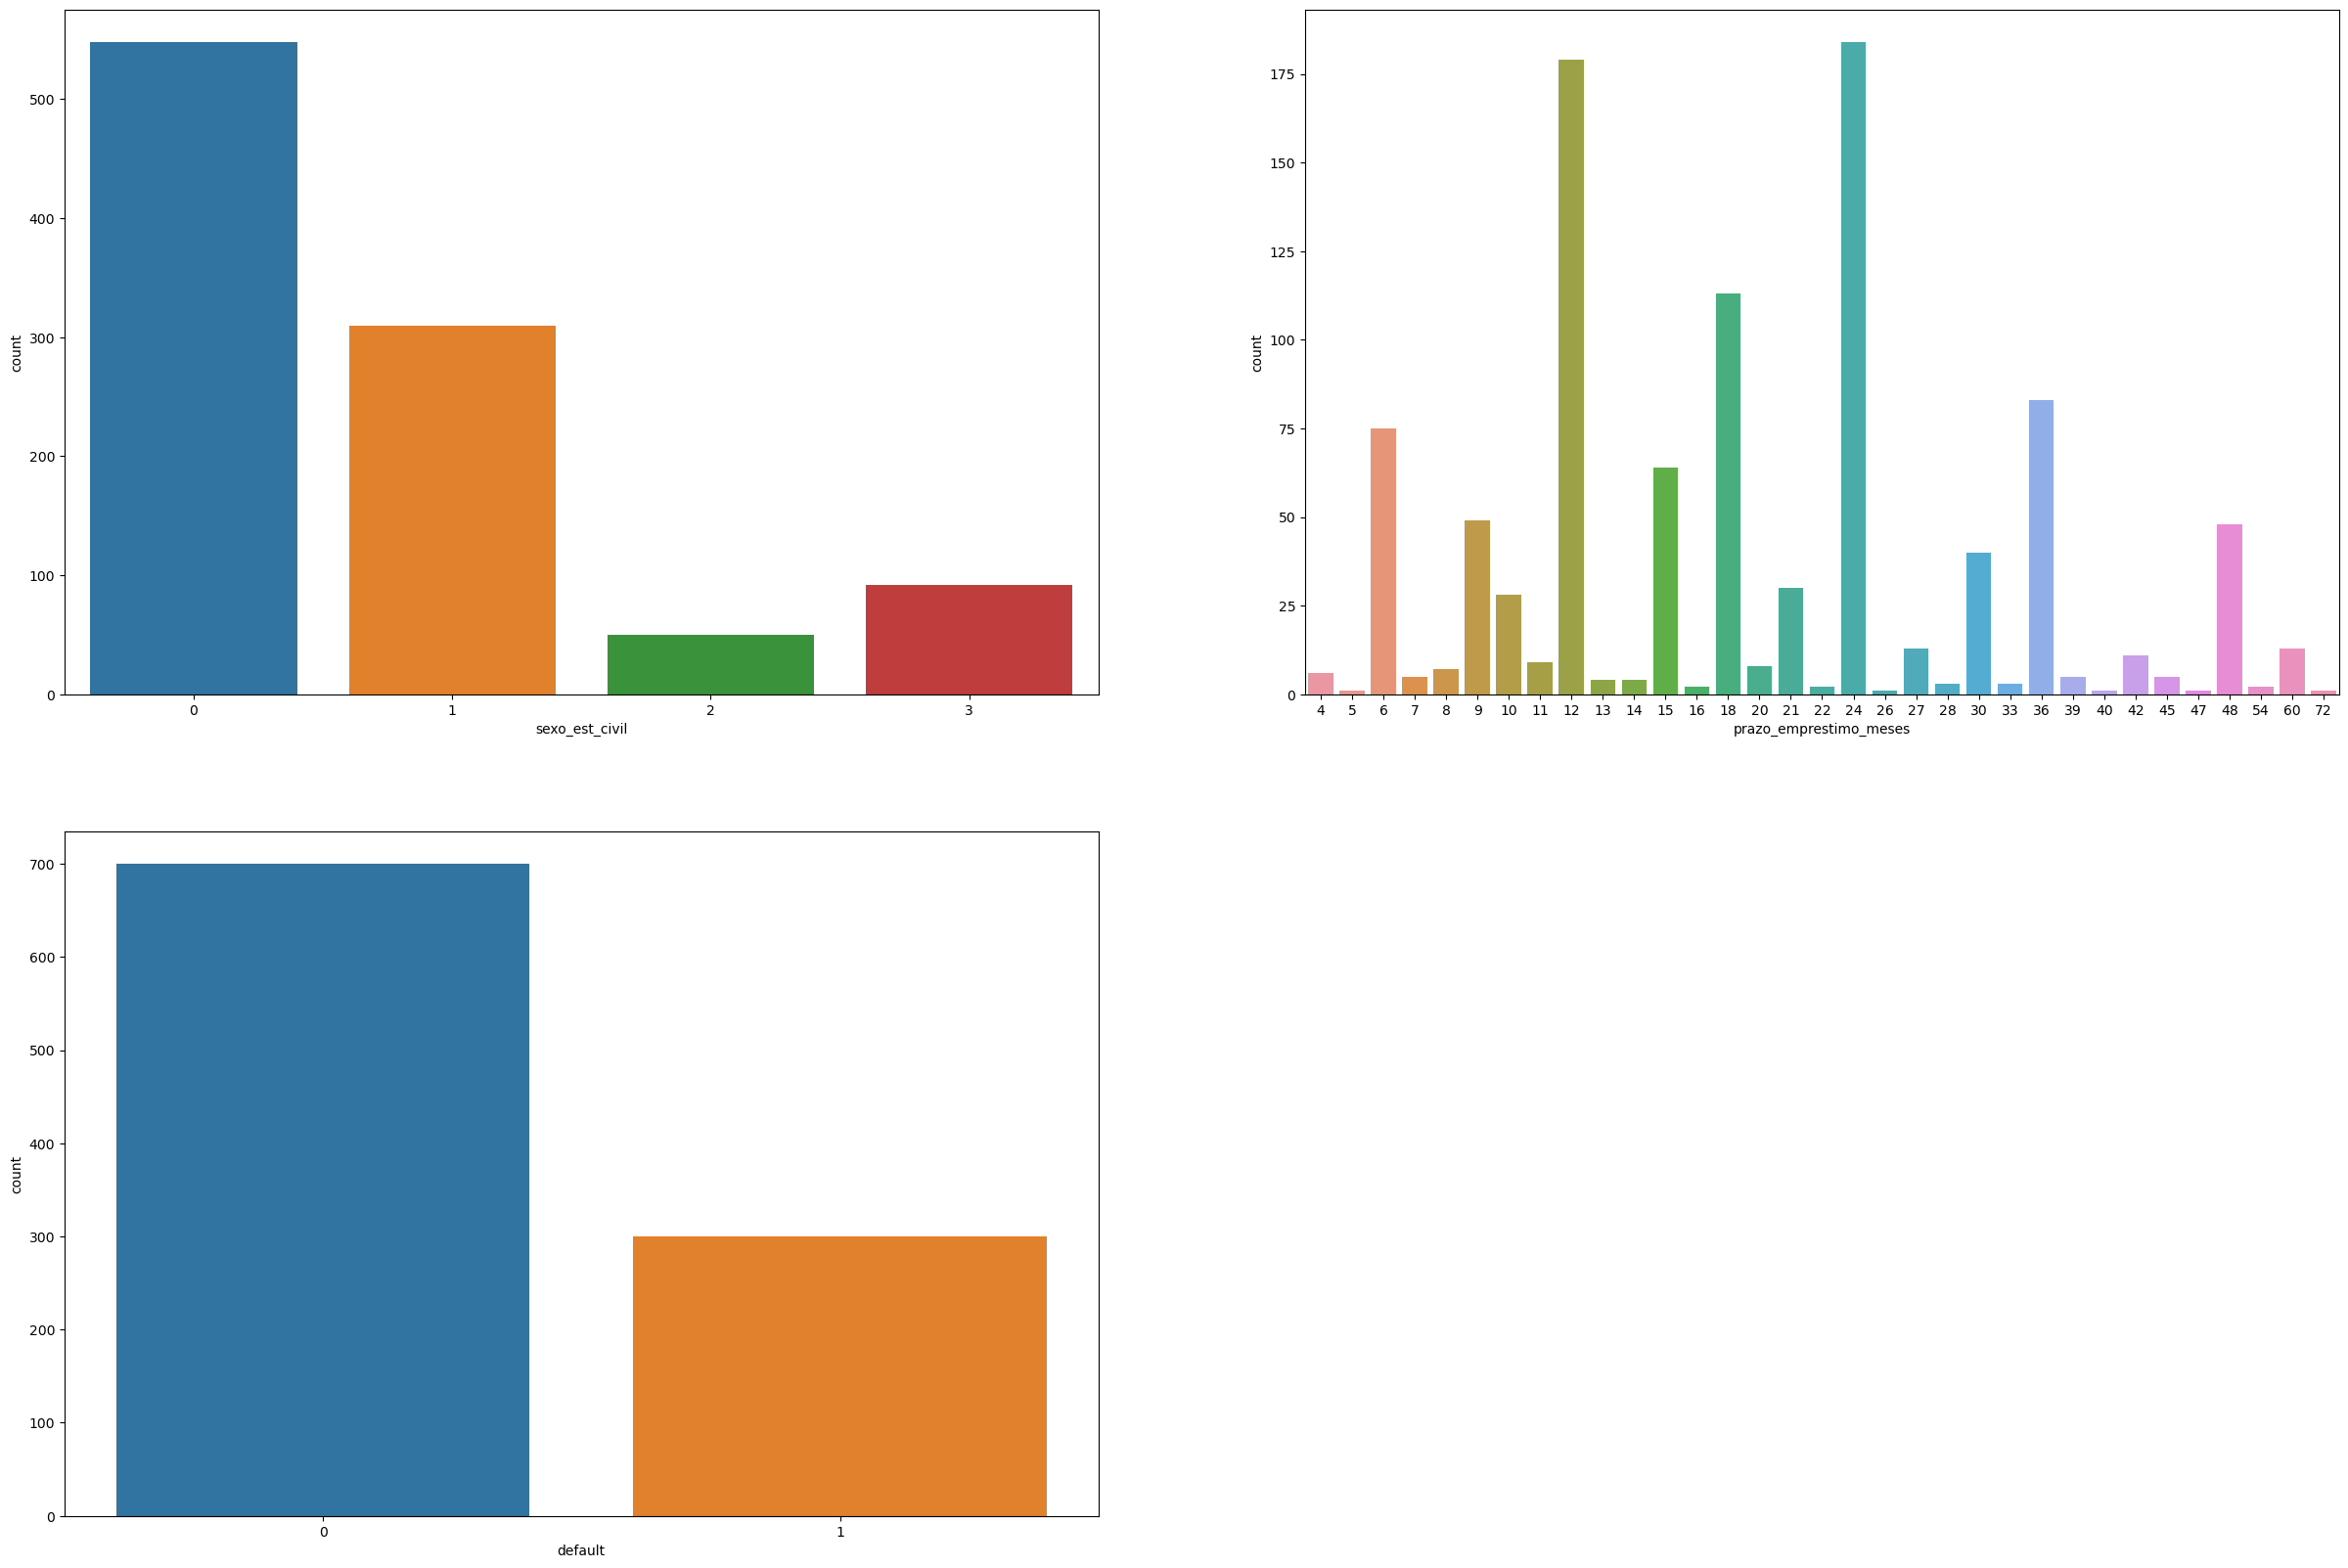

In [97]:
#plotando os histogramas
plt.figure(figsize=(30,20))
for i in lista_histogramas:
    plt.subplot(2,2,i[0]+1)
    sns.countplot(x=i[1],data=df)

<AxesSubplot:xlabel='sexo_est_civil', ylabel='idade'>

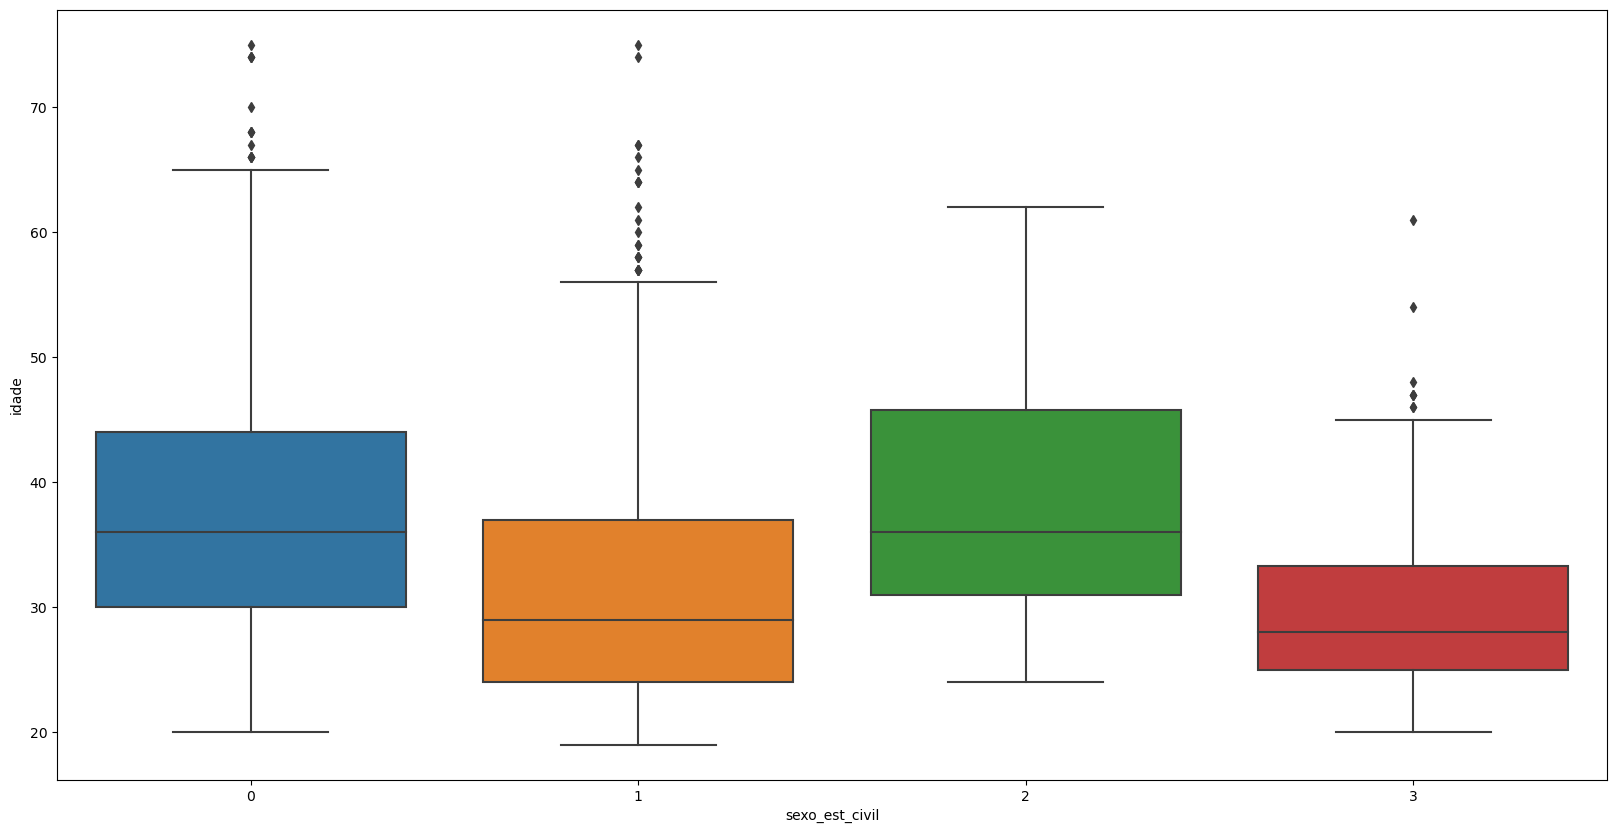

In [98]:
plt.figure(figsize=(20,10))
sns.boxplot(x="sexo_est_civil",y="idade",data=df)